# Linear Regression From Scratch
In this notebook you will implement linear regression using the least squares method.

The notebook will guide you in the general steps. You may use only numpy, pandas, and matplotlib for this exercise.

#### Math Background
The task is to solve linear regression for the data set of ```x``` and ```y```. That is, fit a line y to the data such that ```y = a + bx + e```. Where a and b are coefficents and e is an error term.

We know that ```b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2``` where ```xi```, and ```yi``` are the indivdual observations and ```x_mean```, ```y_mean``` are means of all ```xi``` and ```yi```.

So a reasonable solution then for a fit is ```a = y_mean - b * x_mean```.


#### Implementation Steps
1. Load the file ```reg_data.csv```
2. Display the data with a scatter plot. Write a markdown cell and comment on the structure of the data and what kind of line you think will fit the data. 
3. Implement a function of the least squares method.
4. Plot the predictions from your function.
5. Comment on the output of your function. Does it make sense? Can it be made better? If yes, how?

In [142]:
#import the minimum packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [328]:
#load and inspect the data
df = pd.read_csv("reg_data.csv")
# YOUR CODE HERE
df


,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [329]:
assert df.shape == (100,2)

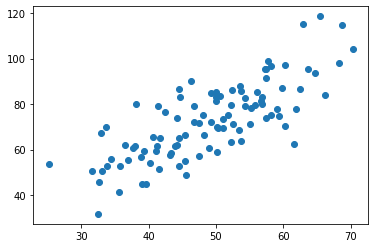

In [330]:
#plot the data (scatter)
# YOUR CODE HERE
plt.scatter(df.X, df.Y)

In [331]:
X =df.X
Y= df.Y

In [332]:
#split train and test data 80/20
#your code here
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

# YOUR CODE HERE


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(80,)
(80,)
(20,)
(20,)


In [333]:
assert x_train.shape == (80,)
assert x_test.shape == (20,)
assert y_train.shape == (80,)
assert y_test.shape == (20,)

b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2
a = y_mean - b * x_mean.

In [354]:
type(x_train)

pandas.core.series.Series

In [359]:

x_mean = np.mean(x_train)
y_mean = np.mean(y_train)
b_upper = 0
b_lower = 0
b = 0
a = 0

for i in range(x_train.shape[0]):
    b_upper += ( x_train.values[i] - x_mean) * (y_train.values[i] - y_mean)
    b_lower += (x_train.values[i] - x_mean)**2

b = b_upper/b_lower
a = y_mean - (b * x_mean)
print(b)
print(a)

1.3450919020620415
6.687439682550206


In [352]:

x_mean = np.mean(x_train)
y_mean = np.mean(y_train)
b_upper = 0
b_lower = 0
b = 0
a = 0
xy = x_train.multiply(y_train)

x_squared = []
y_squared= []
xy_sum= np.sum(xy)
x_sum = np.sum(x_train)
y_sum = np.sum(y_train)
N= len(x_train)
for i in x_train:
    x_squared.append(i**2)
for j in y_train:
    y_squared.append(j**2)

x_squared_sum = np.sum(x_squared)
y_squared_sum = np.sum(y_squared)


b_upper = (N*xy_sum) - (x_sum * y_sum)
b_lower = (N*x_squared_sum)- (x_sum)**2
b = b_upper/b_lower

a = (y_sum - b* x_sum)/N
print(a)
print(b)

6.687439682549962
1.3450919020620462


In [335]:
#implement a least squares function to find a, b


x_mean = x_train.mean()
y_mean = y_train.mean()
b_upper = (( x_train - x_mean) * (y_train - y_mean)).sum()
b_lower = ((x_train - x_mean)**2).sum()
b = b_upper / b_lower
a = y_mean - (b * x_mean)
print(a)

6.687439682550192


In [336]:
assert abs(a - 7.72) <=0.03
assert abs(b - 1.32) <=0.03

AssertionError: 

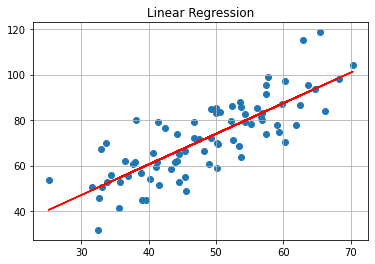

[43.87061265 52.37844622 47.47563963 53.66093226 32.66904376 33.86421497
 52.21179669 25.12848465 34.3331247  57.5045333  41.18201611 56.9012147
 32.94047994 60.26921439 44.50253806 63.61556125 45.61864377 41.37772653
 50.13548549 70.34607562 53.42680403 50.18638949 50.07314563 43.31828263
 59.81320787 48.95588857 60.29732685 44.55560838 36.43600951 55.14218841
 53.69163957 41.10268519 32.50234527 57.50444762 46.73761941 38.11982403
 54.35163488 45.44053073 41.57564262 40.59953838 45.41973014 35.56783005
 56.13038882 62.49469743 38.95476907 54.28232871 42.43647694 57.78822399
 56.72720806 38.00548801 38.81681754 50.55676015 64.70713867 50.03957594
 48.14985889 35.67809389 66.18981661 68.31936082 46.68222865 36.93007661
 59.37082201 33.09383174 56.86890066 40.16689901 37.67565486 39.55790122
 49.20388754 44.1640495  44.21174175 31.588117   50.28283635 61.89622268
 65.41605175 59.04974121 52.55001444 49.23976534 57.36205213 33.64470601
 53.57507753 62.99748075]


In [360]:

x = np.array(x_train)
y=np.array(y_train)

line = b*x + a 

plt.scatter(x,y)
plt.plot(x,line,color="red")
plt.title("Linear Regression")
plt.grid()
plt.show()
# YOUR CODE HERE


In [338]:
assert abs(a +3*b - 11.69) <= 0.05
assert abs(a +100*b - 140) <= 1

AssertionError: 

In [362]:
#Classify your test data in to classes
#if the Y value for a certain X is lower than the line then the class is 0
class_0 = []
class_1 = []

yi = y_test
# YOUR CODE HERE
for i in range(x_test.shape[0]):
    if y_test.values[i] < (a + x_test.values[i]*b):
        class_0.append((x_test.values[i],y_test.values[i]))
    else:
        class_1.append((x_test.values[i],y_test.values[i]))       
    
class_0 = np.array(class_0)
class_1 = np.array(class_1)
print(class_0.shape)
print(class_1.shape)

(11, 2)
(9, 2)


In [364]:
assert 9 < class_0.shape[0] < 13
assert 7 < class_1.shape[0] < 11

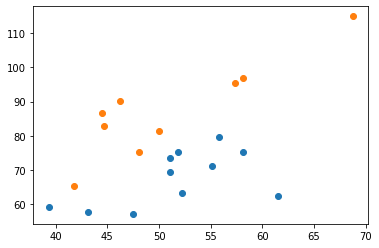

In [368]:
# YOUR CODE HERE
plt.scatter(class_0[:,0],class_0[:,1])
plt.scatter(class_1[:,0],class_1[:,1])

plt.show()

In [370]:
# get the total error for the classes

err = 0
# YOUR CODE HERE
for i in range(x_test.shape[0]):

    err+= abs(   y_test.values[i] - (a + x_test.values[i]*b)  )
print(err)


201.82447860643398


In [ ]:
assert err - 201 < 20